In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
data = pd.read_csv(r"D:\Retail_Store_Data\retail_store_inventory.csv")

In [5]:
df = data.copy()

In [15]:
print(df.head())

         Date Store ID Product ID     Category Region  Inventory Level  \
0  2022-01-01     S001      P0001    Groceries  North              231   
1  2022-01-01     S001      P0002         Toys  South              204   
2  2022-01-01     S001      P0003         Toys   West              102   
3  2022-01-01     S001      P0004         Toys  North              469   
4  2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  
0             Rainy                  0               29.69      Autumn  
1           

In [46]:
print("No of Rows in this dataset - ", len(df))
print("-" * 50)
print("No of Columns in this dataset - ", df.shape[1])
print("-" * 50)
print("Size of this dataset - ", df.shape)

No of Rows in this dataset -  73100
--------------------------------------------------
No of Columns in this dataset -  15
--------------------------------------------------
Size of this dataset -  (73100, 15)


In [8]:
df.isna().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [9]:
df.nunique()

Date                    731
Store ID                  5
Product ID               20
Category                  5
Region                    4
Inventory Level         451
Units Sold              498
Units Ordered           181
Demand Forecast       31608
Price                  8999
Discount                  5
Weather Condition         4
Holiday/Promotion         2
Competitor Pricing     9751
Seasonality               4
dtype: int64

In [45]:
a = df['Date']
print(a.head(10))
print("-" * 30)
print(a.tail(10))

0    2022-01-01
1    2022-01-01
2    2022-01-01
3    2022-01-01
4    2022-01-01
5    2022-01-01
6    2022-01-01
7    2022-01-01
8    2022-01-01
9    2022-01-01
Name: Date, dtype: object
------------------------------
73090    2024-01-01
73091    2024-01-01
73092    2024-01-01
73093    2024-01-01
73094    2024-01-01
73095    2024-01-01
73096    2024-01-01
73097    2024-01-01
73098    2024-01-01
73099    2024-01-01
Name: Date, dtype: object


In [50]:
autumn_cloudy_data = df[(df['Seasonality'] == 'Autumn') & (df['Weather Condition'] == 'Rainy')]
if autumn_cloudy_data.empty:
    print("No data found for 'Autumn' season with 'Cloudy' weather.")
else:
    sales_by_region_category = autumn_cloudy_data.groupby(['Region', 'Category']).size().reset_index(name='Sales_Count')

    sales_by_region_category = sales_by_region_category.sort_values(
        by=['Region', 'Sales_Count'],
        ascending=[True, False] # Sort by Region A-Z, then by Sales_Count High-Low
    )

    print("Categories sold in each region during Autumn and Rainy weather condition :")
    print(sales_by_region_category)

Categories sold in each region during Autumn and Rainy weather condition :
   Region     Category  Sales_Count
0    East     Clothing          258
3    East    Groceries          243
2    East    Furniture          240
1    East  Electronics          235
4    East         Toys          222
8   North    Groceries          243
9   North         Toys          236
6   North  Electronics          235
7   North    Furniture          230
5   North     Clothing          202
13  South    Groceries          239
14  South         Toys          234
10  South     Clothing          232
12  South    Furniture          208
11  South  Electronics          199
17   West    Furniture          234
16   West  Electronics          232
18   West    Groceries          228
15   West     Clothing          222
19   West         Toys          219


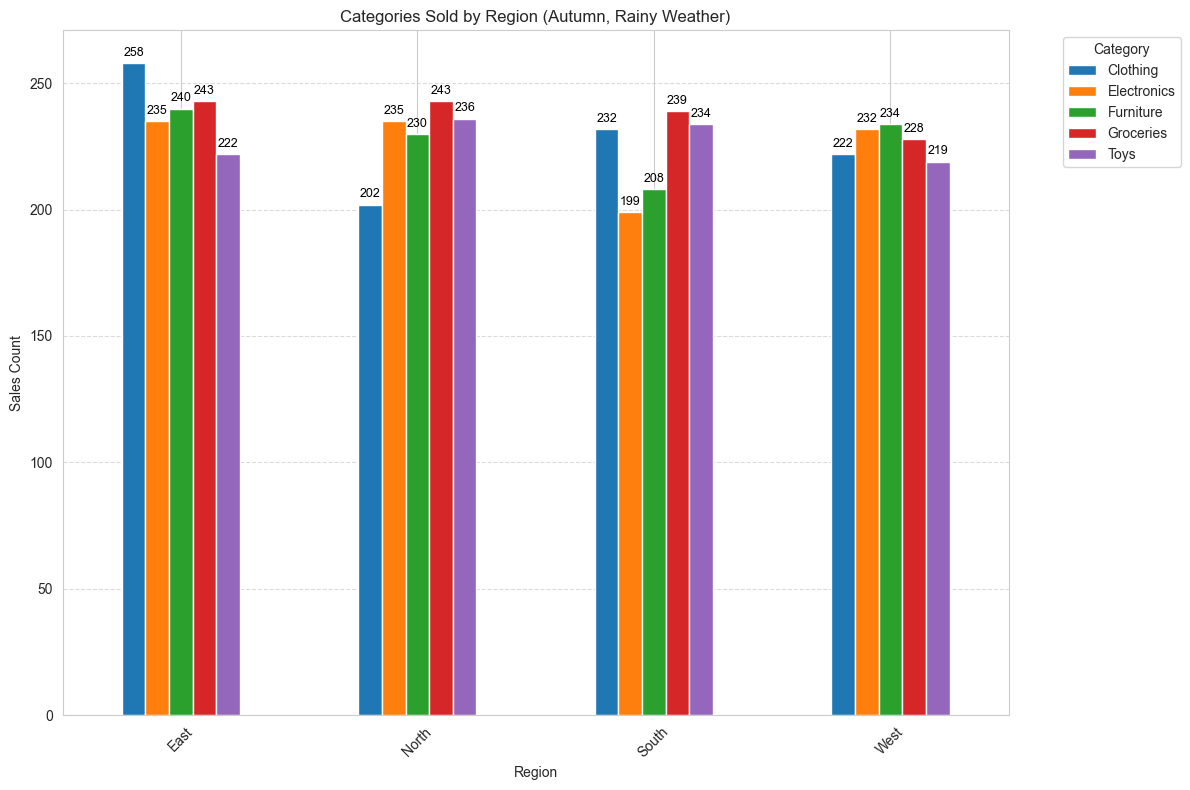

In [37]:
sales_by_region_category_df = pd.DataFrame(sales_by_region_category)
autumn_cloudy_data_fig = sales_by_region_category_df.pivot(index='Region', columns='Category', values='Sales_Count')
ax = autumn_cloudy_data_fig.plot(kind='bar', figsize = (12, 8))
ax.set_title('Categories Sold by Region (Autumn, Rainy Weather)')
ax.set_xlabel('Region')
ax.set_ylabel('Sales Count')
ax.tick_params(axis='x', rotation=45)
for container in ax.containers:
        # Loop through each bar in the container
        for bar in container:
            height = bar.get_height()
            # Only annotate if the height is not NaN (in case of missing categories in some regions)
            if not pd.isna(height):
                ax.annotate(f'{int(height)}', # Format to integer as counts are whole numbers
                            xy=(bar.get_x() + bar.get_width() / 2, height), # Position of the text
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', # Horizontal and vertical alignment
                            fontsize=9,
                            color='black')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()